<a href="https://colab.research.google.com/github/chetane/businessreport/blob/main/Enron__Data_Business_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Enron Email Analysis

> Student Name: Sookdeb Chetane

> Student ID: 20918918

> Lecturer Name: Ramchurn Navishna

> Workshop Time: Monday, 13:40 - 15:50

#Downloading Enron Dataset

In [1]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-23 15:43:29--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-23 15:43:30--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  46.4MB/s    in 23s     

2023-05-23 15:43:54 (34.

#Importing Modules and Connecting Database

In [63]:
#Importing the modules requires (sqlite3, pandas, matplotlib, ipywidgets, numpy, seaborn)
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
import seaborn as sns

In [64]:
#Connecting enron database
conn = sqlite3.connect("enron.db")

In [65]:
#Initiating the cursor
cur = conn.cursor()

#Check Schema of Database

In [66]:
#Retrieve the names of all tables in the SQLite database and store the result in a DataFrame
query = "SELECT name FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

,name
0,employeelist
1,message
2,recipientinfo
3,referenceinfo


#Check Schema of Tables

###Schema of employeelist

In [67]:
#Retrieve column information for the table 'employeelist' using PRAGMA statement and store the result in a DataFrame.
query = "PRAGMA table_info(employeelist);"
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,eid,INTEGER,1,None,1
1,1,firstName,VARCHAR(31),1,'',0
2,2,lastName,VARCHAR(31),1,'',0
3,3,Email_id,VARCHAR(31),1,'',0
4,4,Email2,VARCHAR(31),0,None,0
5,5,Email3,VARCHAR(31),0,None,0
6,6,EMail4,VARCHAR(31),0,None,0
7,7,folder,VARCHAR(31),1,'',0
8,8,status,VARCHAR(50),0,None,0


###Schema of message

In [68]:
#Retrieve column information for the table 'message' using PRAGMA statement and store the result in a DataFrame.
query = "PRAGMA table_info(message);"
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,mid,INTEGER,1,'0',1
1,1,sender,VARCHAR(127),1,'',0
2,2,date,DATETIME,0,None,0
3,3,message_id,VARCHAR(127),0,None,0
4,4,subject,TEXT,0,None,0
5,5,body,TEXT,0,None,0
6,6,folder,VARCHAR(127),1,'',0


###Schema of recipientinfo

In [69]:
#Retrieve column information for the table 'recipientinfo' using PRAGMA statement and store the result in a DataFrame.
query = "PRAGMA table_info(recipientinfo);"
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,rid,INTEGER,1,'0',1
1,1,mid,INTEGER,1,'0',0
2,2,rtype,TEXT,0,None,0
3,3,rvalue,VARCHAR(127),0,None,0
4,4,dater,DATETIME,0,None,0


###Schema of referenceinfo

In [70]:
#Retrieve column information for the table 'referenceinfo' using PRAGMA statement and store the result in a DataFrame.
query = "PRAGMA table_info(referenceinfo);"
pd.read_sql_query(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,rfid,INTEGER,1,'0',1
1,1,mid,INTEGER,1,'0',0
2,2,reference,TEXT,0,None,0


#Converting to Dataframe

###Converting employeelist to dataframe

In [71]:
#Retrieve all data from the 'employeelist' table and store it in a DataFrame named 'employeelist_df'
sql='''
SELECT * from employeelist;
'''
#Load the data into a DataFrame
employeelist_df = pd.read_sql_query(sql, conn)
employeelist_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


###Converting message to dataframe

In [72]:
#Retrieve all data from the 'message' table and store it in a DataFrame named 'message_df'
sql='''
SELECT * from message;
'''
#Load the data into a DataFrame
message_df = pd.read_sql_query(sql, conn)
message_df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


###Converting recipientinfo to dataframe

In [73]:
#Retrieve all data from the 'recipientinfo' table and store it in a DataFrame named 'recipientinfo_df'
sql='''
SELECT * from recipientinfo;
'''
#Load the data into a DataFrame
recipientinfo_df = pd.read_sql_query(sql, conn)
recipientinfo_df

,rid,mid,rtype,rvalue,dater
0,67,52,TO,all.worldwide@enron.com,None
1,68,53,TO,all.downtown@enron.com,None
2,69,54,TO,all.enron-worldwide@enron.com,None
3,70,55,TO,all.worldwide@enron.com,None
4,71,56,TO,all_enron_north.america@enron.com,None
...,...,...,...,...,...
2064437,3242059,404927,BCC,john.anderson@enron.com,None
2064438,3242060,404927,BCC,mark.guzman@enron.com,None
2064439,3242061,404927,BCC,michael.mier@enron.com,None
2064440,3242062,404927,BCC,pete.davis@enron.com,None


###Converting referenceinfo to dataframe

In [74]:
#Retrieve all data from the 'referenceinfo' table and store it in a DataFrame named 'referenceinfo_df'
sql='''
SELECT * from referenceinfo;
'''
#Load the data into a DataFrame
referenceinfo_df = pd.read_sql_query(sql, conn)
referenceinfo_df

,rfid,mid,reference
0,2,79,"> From: Le Vine, Debi> Sent: Thursday, August ..."
1,3,99,"> From: Golden, Mark> Sent: Thursday, August 2..."
2,8,533,"From: Sole, JeanneSent: Friday, August 18, 200..."
3,13,842,"From: \tGrigsby, Mike Sent:\tThursday, March ..."
4,14,845,"From: Monaco, John [EM] [mailto:john.monaco@ci..."
...,...,...,...
54773,63020,404873,From: \tEnron Announcements/Corp/Enron@ENRON ...
54774,63021,404888,"From: \tBlair, Kit Sent:\tWednesday, November..."
54775,63022,404907,"From: \tDean, Craig Sent:\tThursday, January ..."
54776,63023,404918,"From: \tDean, Craig Sent:\tTuesday, February ..."


#Analyses and Visualisations

###Email Traffic Overtime

####Messages Sent Per Day Visualisations


In [75]:
#Selects the "date" column from the "message" table
sql= """
SELECT date
FROM message
"""

In [76]:
#Import the pandas library for data manipulation and analysis
import pandas as pd

#Execute the SQL query stored in the variable 'sql' and fetch the results using the database connection 'conn'
message_df = pd.read_sql_query(sql, conn)

#Display the resulting data in a pandas DataFrame called 'message_df'
message_df

,date
0,2000-01-21 04:51:00
1,2000-01-24 01:37:00
2,2000-01-24 02:06:00
3,2000-02-02 10:21:00
4,2000-02-07 22:16:00
...,...
252754,2002-02-06 16:51:29
252755,2002-02-06 17:17:39
252756,2002-02-06 20:09:37
252757,2002-02-07 04:38:13


In [77]:
#Select the formatted date in the '%Y-%m-%d' format and assign it as "date"
sql = """
SELECT strftime('%Y-%m-%d', date) 
AS date, COUNT(*) AS count FROM message 
GROUP BY date
"""
#Calculate the count of rows in the "message" table and assign it as count
#Group the results based on the "date" column

In [78]:
#Execute the SQL query stored in the variable 'sql' and fetch the results using the database connection 'conn'
msgperday_df = pd.read_sql_query(sql, conn)

#Display the resulting data in a pandas DataFrame called 'msgperday_df'
msgperday_df

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


<Axes: xlabel='date', ylabel='count'>

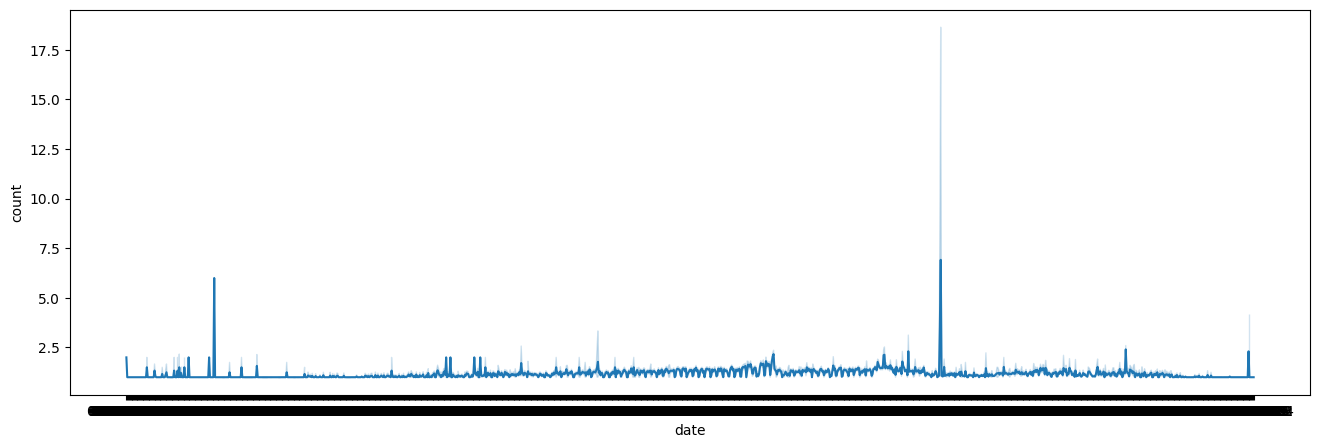

In [79]:
#Create a figure with a size of 16x5 using `plt.subplots()` from the matplotlib library
fig = plt.subplots(figsize=(16,5))

#Plot a line plot using seaborn's `lineplot()` function
#Set the x-axis values as the 'date' column from the 'msgperday_df' DataFrame
#Set the y-axis values as the 'count' column from the same DataFrame
sns.lineplot(x = 'date', y='count', data = msgperday_df)

**Enter Analysis Here**

####Messages Sent Per Week Visualisations

In [80]:
#Select the formatted date in the '%Y-%m-%d' format and assign it as "date"
sql = """
SELECT strftime('%Y,%w', date) 
AS date, COUNT(*) AS count FROM message 
GROUP by date
"""

#Calculate the count of rows in the "message" table and assign it as count
#Group the results based on the "date" column

In [81]:
#Execute the SQL query stored in the variable 'sql' and fetch the results using the database connection 'conn'
msgperweek_df = pd.read_sql_query(sql, conn)

#Display the resulting data in a pandas DataFrame called 'msgperweek_df'
msgperweek_df

,date,count
0,"0001,3",2
1,"0001,1",1
2,"0001,2",1
3,"0001,3",1
4,"0001,1",1
...,...,...
194082,"2020,2",1
194083,"2043,1",1
194084,"2044,6",1
194085,"2044,1",1


<Axes: xlabel='date', ylabel='count'>

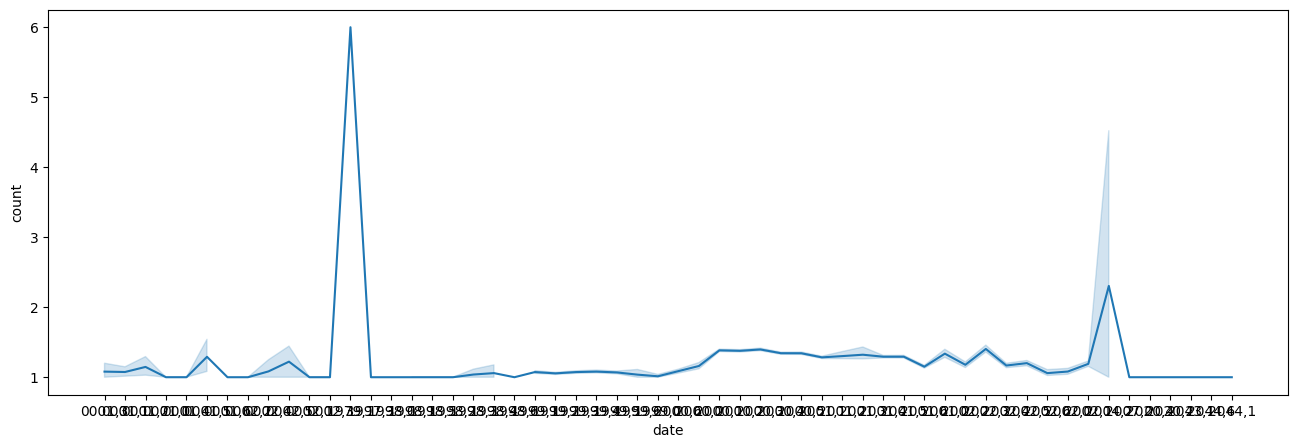

In [82]:
#Create a figure with a size of 16x5 using `plt.subplots()` from the matplotlib library
fig = plt.subplots(figsize=(16,5))

#Plot a line plot using seaborn's `lineplot()` function
#Set the x-axis values as the 'date' column from the 'msgperweek_df' DataFrame
#Set the y-axis values as the 'count' column from the same DataFrame
sns.lineplot(x = 'date', y='count', data = msgperweek_df)

**Enter Analysis Here**

####Messages Sent Per Month Visualisations

In [83]:
#Select the formatted date in the '%Y-%m-%d' format and assign it as "date"
sql = """
SELECT strftime('%Y, %m', date) 
AS date, COUNT(*) AS count FROM message 
GROUP by date
"""

#Calculate the count of rows in the "message" table and assign it as count
#Group the results based on the "date" column

In [84]:
#Execute the SQL query stored in the variable 'sql' and fetch the results using the database connection 'conn'
msgpermonth_df = pd.read_sql_query(sql, conn)

#Display the resulting data in a pandas DataFrame called 'msgpermonth_df'
msgpermonth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194087 entries, 0 to 194086
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    194087 non-null  object
 1   count   194087 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ MB


<Axes: xlabel='date', ylabel='count'>

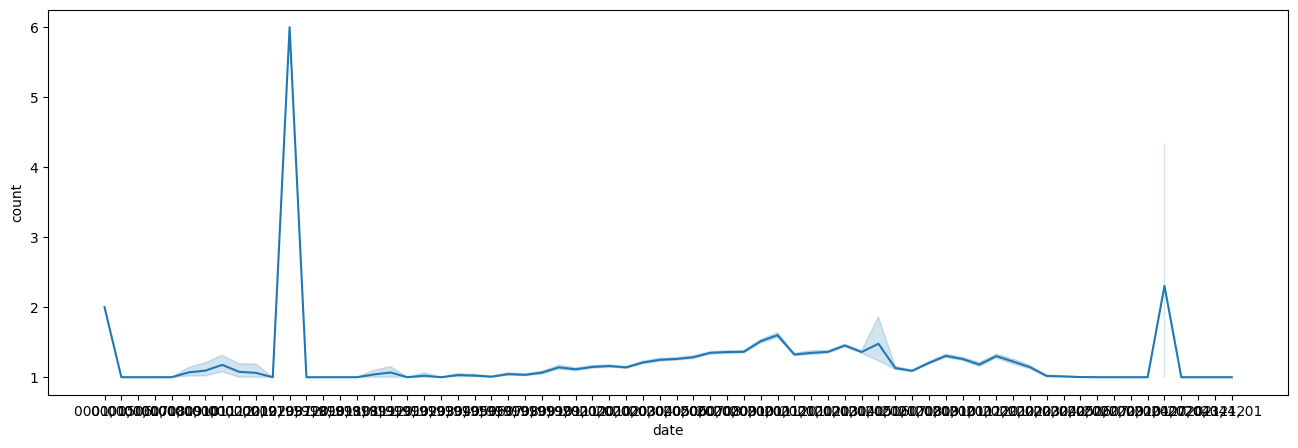

In [85]:
#Create a figure with a size of 16x5 using `plt.subplots()` from the matplotlib library
fig = plt.subplots(figsize=(16,5))

#Plot a line plot using seaborn's `lineplot()` function
#Set the x-axis values as the 'date' column from the 'msgpermonth_df' DataFrame
#Set the y-axis values as the 'count' column from the same DataFrame
sns.lineplot(x = 'date', y='count', data = msgpermonth_df)

**Enter Analysis Here**

###Top Senders and Recipients

####Top Senders

In [86]:
#Select the "sender" column and count the number of occurrences for each sender in the "message" table
sql_senders = """
SELECT sender, COUNT(*)
AS count
FROM message
GROUP BY sender
ORDER BY count
DESC
LIMIT 10
"""

#Group the results by the "sender" column
#Order the results in descending order based on the count
#Limit the output to the top 10 senders with the highest counts


In [87]:
#Execute the SQL query stored in the variable 'sql_senders' and fetch the results using the database connection 'conn'
top_sender_df = pd.read_sql_query(sql_senders, conn)

#Store and Display the resulting data in a pandas DataFrame called 'top_sender_df'
top_sender_df

,sender,count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


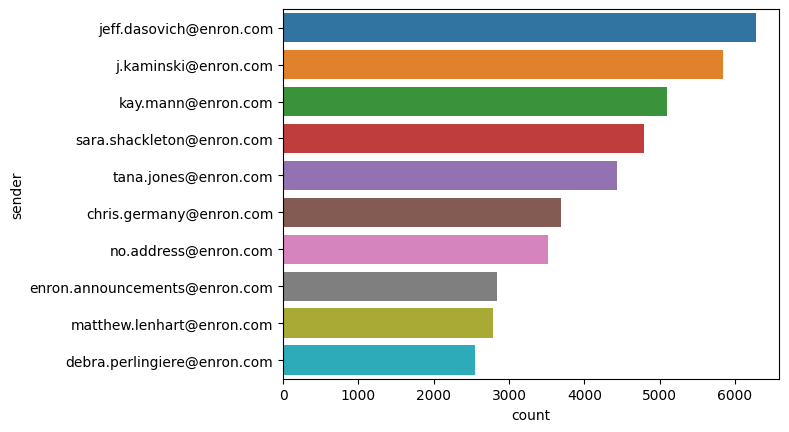

In [88]:
#Assign the DataFrame 'top_sender_df' to the variable 'data'
data = top_sender_df

#Create a bar plot using seaborn's `barplot()` function
#Set the x-axis values as the 'count' column and the y-axis values as the 'sender' column from the 'data' DataFrame
sns.barplot(x = "count", y = "sender", data=data)

#Display the plot
plt.show()

**Enter Analysis Here**

####Top Recipients

In [89]:
#Select the "rvalue" column as the recipient and count the number of occurrences for each recipient in the "recipientinfo" table
sql_recipients = """
SELECT rvalue AS recipient, COUNT(*)
AS count
FROM recipientinfo
GROUP BY recipient
ORDER BY count
DESC
LIMIT 20
"""

#Group the results by the "recipient" column
#Order the results in descending order based on the count
#Limit the output to the top 20 recipients with the highest counts

In [90]:
#Execute the SQL query stored in the variable 'sql_recipients' and fetch the results using the database connection 'conn'
top_recipient_df = pd.read_sql_query(sql_recipients, conn)

#Store and Display the resulting data in a pandas DataFrame called 'top_recipient_df'
top_recipient_df

,recipient,count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


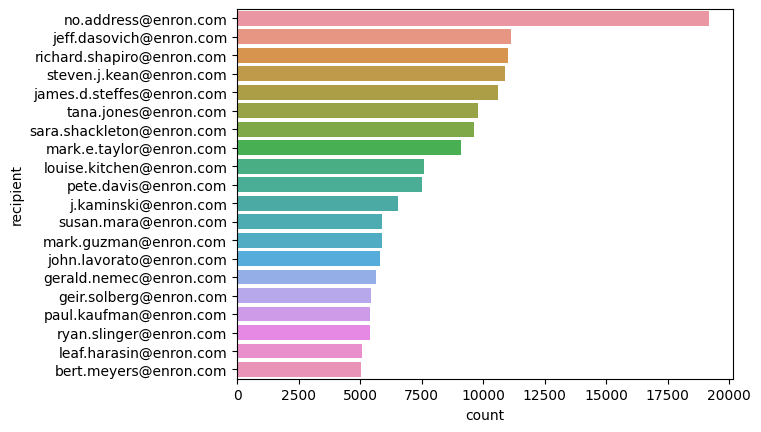

In [91]:
#Assign the DataFrame 'top_recipient_df' to the variable 'data'
data = top_recipient_df

#Create a bar plot using seaborn's `barplot()` function
#Set the x-axis values as the 'count' column and the y-axis values as the 'recipient' column from the 'data' DataFrame
sns.barplot(x = "count", y = "recipient", data=data)

#Display the plot
plt.show()

**Enter Analysis Here**

###Email Distribution by Recipient Type

In [92]:
#Select the "rtype" column and count the number of occurrences for each rtype in the "recipientinfo" table
sql_recipient_type = """
SELECT rtype, COUNT(rtype)
AS count
FROM recipientinfo
GROUP BY rtype
ORDER BY rtype
"""

#Group the results by the "rtype" column
#Order the results based on the "rtype" column in ascending order

In [93]:
#Execute the SQL query stored in the variable 'recipient_df' and fetch the results using the database connection 'conn'
recipient_df = pd.read_sql_query(sql_recipient_type, conn)

#Store and Display the resulting data in a pandas DataFrame called 'recipient_df'
recipient_df

,rtype,count
0,BCC,253713
1,CC,253735
2,TO,1556994


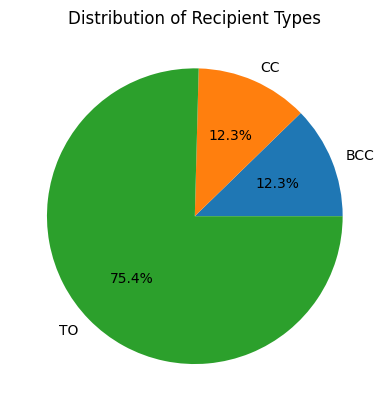

In [95]:
#Assign the 'rtype' column from 'recipient_d' DataFrame to the variable 'labels'
labels = recipient_df['rtype']

#Assign the 'count' column from 'recipient_d' DataFrame to the variable 'values'
values = recipient_df['count']

#Create a pie chart using matplotlib's `pie()` function
#Set the values as the 'values' variable and the labels as the 'labels' variable
#Format the autopct to display the percentage with one decimal place
plt.pie(values, labels=labels, autopct='%1.1f%%')

#Set the title of the pie chart
plt.title('Distribution of Recipient Types')

#Display the chart
plt.show()

**Enter Analysis Here**